In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import itertools
import statsmodels.api as sm
import warnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from matplotlib import pyplot as plt
from pandas.plotting import autocorrelation_plot
from matplotlib.pyplot import figure
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
warnings.filterwarnings('ignore')


In [2]:
#Importing dataset
Dataset= pd.read_csv('Dataset.csv')
#Checking datatypes
Dataset.dtypes


Sr                   int64
Date                object
Room Amount        float64
Dine In Amount       int64
Takeaway Amount      int64
Bar Amount           int64
dtype: object

In [3]:
#Coverting Date column format to d-m-y format
Dataset['Date'] = pd.to_datetime(Dataset.Date, format="%d-%m-%Y")
#Fetching top 5 vaules from the data
Dataset.head()


,Sr,Date,Room Amount,Dine In Amount,Takeaway Amount,Bar Amount
0,1,2013-09-01,0.0,53722,0,7760
1,2,2013-09-02,0.0,39137,0,25239
2,3,2013-09-03,0.0,597,0,4127
3,4,2013-09-04,0.0,0,0,2273
4,5,2013-09-05,0.0,4999,0,12505


In [4]:
#Aganing cheking type for date that it coverted to date from object
Dataset.dtypes


Sr                          int64
Date               datetime64[ns]
Room Amount               float64
Dine In Amount              int64
Takeaway Amount             int64
Bar Amount                  int64
dtype: object

In [5]:
#Augmented Dickey–Fuller test on Dine Sales
Dine_adt = Dataset['Dine In Amount']
adfuller(Dine_adt)


(-7.054097904424307,
 5.431345838064016e-10,
 21,
 2980,
 {'1%': -3.4325462892049194,
  '5%': -2.8625103776222067,
  '10%': -2.5672865579253186},
 67806.3146818584)

In [6]:
# Creating new datafram contiang column of Date and dine in amount
Data_Dine =Dataset[['Date','Dine In Amount']]
#seting date cloumn as index
Data_Dine=Data_Dine.set_index('Date')
#Fetching top 5 rows
Data_Dine.head()


,Dine In Amount
Date,
2013-09-01,53722
2013-09-02,39137
2013-09-03,597
2013-09-04,0
2013-09-05,4999


In [7]:
#setting asfreq as d
Data_Dine= Data_Dine.asfreq('D')


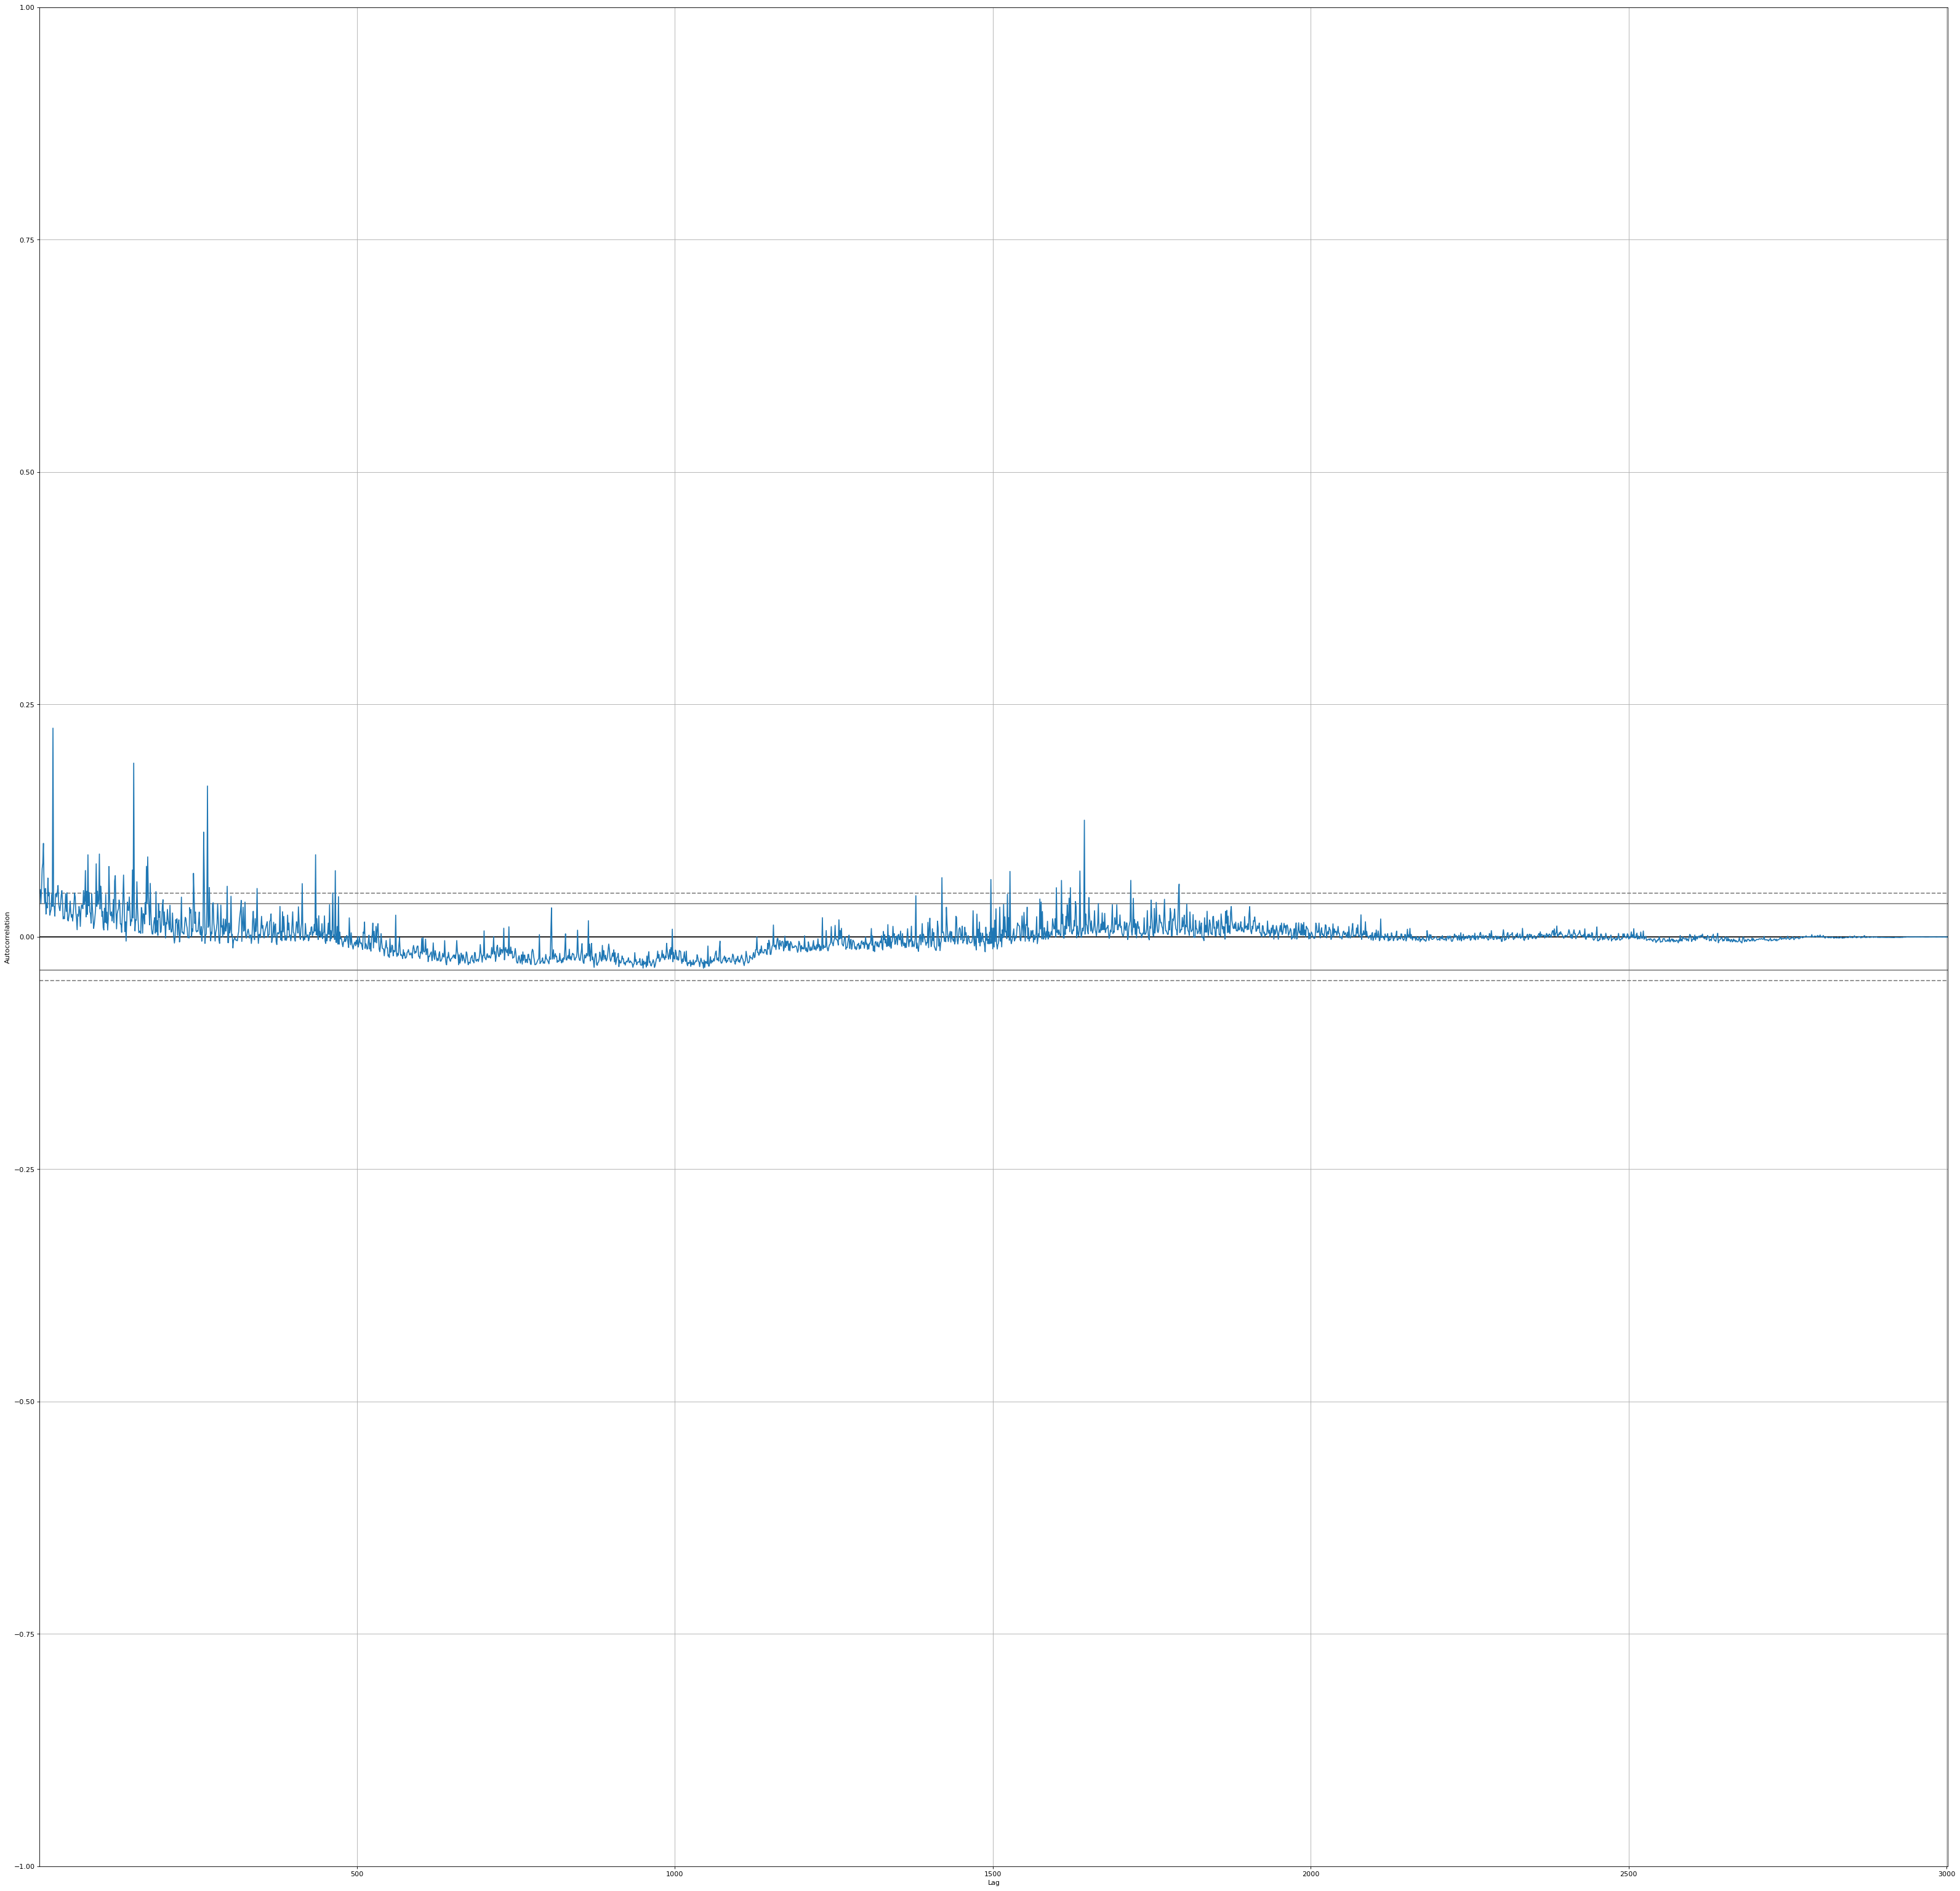

In [8]:
#ploting autocorrelation graph to find seasons
figure(figsize=(50,50),dpi=80)
autocorrelation_plot(Data_Dine)
plt.show()


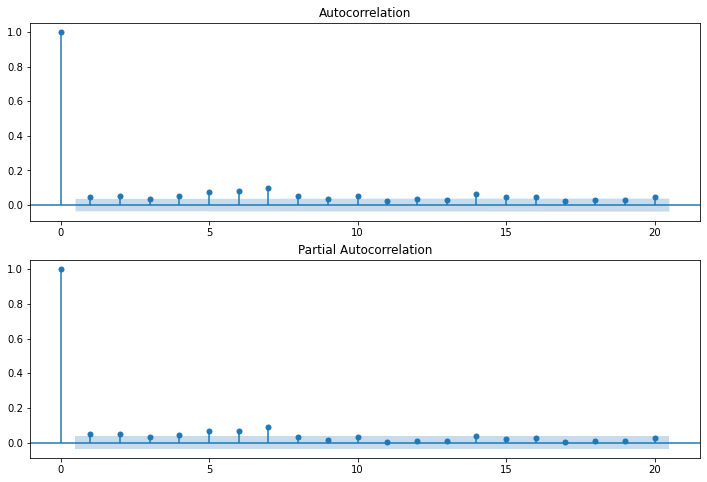

In [9]:
#plotting autocorrelation graph
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig= sm.graphics.tsa.plot_acf(Data_Dine,lags=20, ax=ax1)
#plotting partial correlation graph
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(Data_Dine, lags=20, ax=ax2)


In [10]:
# spillting data for test and train set
Data_Dine_Train = Data_Dine.iloc[:len(Data_Dine) - 600]
Data_Dine_Test = Data_Dine.iloc[len(Data_Dine)-600:]
# creating new dataframe with half data for seasonal decompose
Data_Dine_S = Data_Dine.iloc[: len(Data_Dine) - 1501]


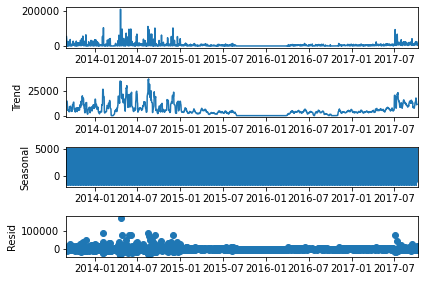

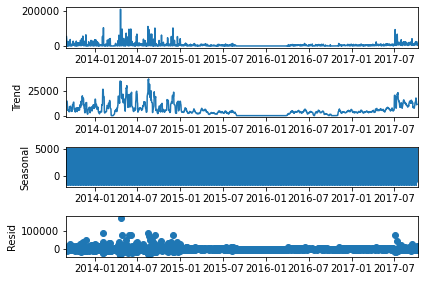

In [11]:
#plotting seasonal decompose chart
res = seasonal_decompose(Data_Dine_S)
fig,(ax1,ax2,ax3)=plt.subplots(3,1,figsize=(500,300))
res.plot()


In [12]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12)
                for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))


Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [13]:
warnings.filterwarnings("ignore")  # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod =SARIMAX(Data_Dine,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:68949.31359224429
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:68639.52671811206
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:70324.41970508649
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:68220.55012557638
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:68651.12128373109
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:68413.16576359724
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:69227.25911735505
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:68221.44468517667
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:68877.52322532062
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:68582.49149943523
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:70301.45178872325
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:68628.79995678317
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:68620.09537798361
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:68399.89170733863
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:69336.59525320759
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:68630.79001441214
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:70544.26605178634
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:70273.17829113768
ARIMA(0, 1

In [14]:
# training arima model
Dine_Model_1= ARIMA(Data_Dine_Train, order=(0,0,1)).fit(disp=0)


In [15]:
# printing arima model results
Dine_Model_1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:         Dine In Amount   No. Observations:                 2402
Model:                     ARMA(0, 1)   Log Likelihood              -27689.782
Method:                       css-mle   S.D. of innovations          24559.740
Date:                Mon, 29 Nov 2021   AIC                          55385.563
Time:                        17:05:55   BIC                          55402.915
Sample:                    09-01-2013   HQIC                         55391.876
                         - 03-29-2020                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 8336.8859    515.233     16.181      0.000    7327.048    9346.724
ma.L1.Dine In Amount     0.0282      0.020      1.429      0.153      -0.010       0.067
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1          -35.4798           +0.0000j           35.4798            0.5000
-----------------------------------------------------------------------------
"""

In [16]:
#prediciting sales with arima model
Arima_Pred=Dine_Model_1.predict(start = Data_Dine_Train.shape[0],end= Data_Dine_Train.shape[0]+600)
Arima_Pred


2020-03-30    8108.351346
2020-03-31    8336.885928
2020-04-01    8336.885928
2020-04-02    8336.885928
2020-04-03    8336.885928
                 ...     
2021-11-16    8336.885928
2021-11-17    8336.885928
2021-11-18    8336.885928
2021-11-19    8336.885928
2021-11-20    8336.885928
Freq: D, Length: 601, dtype: float64

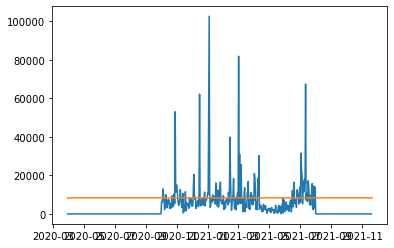

In [17]:
#plotting line garph actual vs predicted values
plt.plot(Data_Dine_Test)
plt.plot(Arima_Pred)


In [18]:
# training sarimax model
Dine_Model_2 = SARIMAX(Data_Dine_Train, order=(0, 0, 1),
                              seasonal_order=(1, 0, 0, 12)).fit(disp=0)


In [19]:
#sarimax model results
Dine_Model_2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                      Dine In Amount   No. Observations:                 2402
Model:             SARIMAX(0, 0, 1)x(1, 0, [], 12)   Log Likelihood              -27791.342
Date:                             Mon, 29 Nov 2021   AIC                          55588.684
Time:                                     17:05:56   BIC                          55606.036
Sample:                                 09-01-2013   HQIC                         55594.997
                                      - 03-29-2020                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0914      0.010      9.116      0.000       0.072       0.111
ar.S.L12       0.1083      0.008     12.842      0.000       0.092       0.125
sigma2      6.657e+08    1.2e-11   5.53e+19      0.000    6.66e+08    6.66e+08
===================================================================================
Ljung-Box (L1) (Q):                  10.74   Jarque-Bera (JB):          39122752.41
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               5.69   Skew:                            20.42
Prob(H) (two-sided):                  0.00   Kurtosis:                       626.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.68e+32. Standard errors may be unstable.
"""

In [20]:
# prediciting sales with sarima model
Sarima_Pred = Dine_Model_2.predict(
    start=Data_Dine_Train.shape[0], end=Data_Dine_Train.shape[0]+600)
Sarima_Pred


2020-03-30    3.825071e+02
2020-03-31    2.700909e+02
2020-04-01    1.312551e+02
2020-04-02    2.729066e+01
2020-04-03    5.448517e-15
                  ...     
2021-11-16    7.112759e-63
2021-11-17    6.081394e-62
2021-11-18    5.249751e-63
2021-11-19    7.219954e-63
2021-11-20    2.057381e-46
Freq: D, Name: predicted_mean, Length: 601, dtype: float64

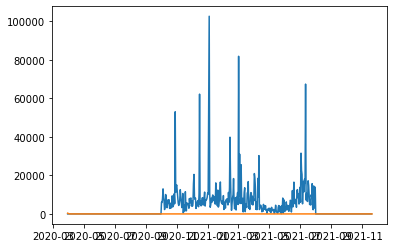

In [21]:
#plotting line garph actual vs predicted values
plt.plot(Data_Dine_Test)
plt.plot(Sarima_Pred)


In [22]:
# training Exponential Smoothing model
Dine_Model_3 = ExponentialSmoothing(Data_Dine_Train,trend="add",seasonal="add",seasonal_periods=365).fit()


In [23]:
#Exponential Smoothing model results
Dine_Model_3.summary()


Dep. Variable:,Dine In Amount,No. Observations:,2402
Model:,ExponentialSmoothing,SSE,1654175172121.232
Optimized:,True,AIC,49619.340
Trend:,Additive,BIC,51753.657
Seasonal:,Additive,AICC,49755.313
Seasonal Periods:,365,Date:,"Mon, 29 Nov 2021"
Box-Cox:,False,Time:,17:05:57
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0050000,alpha,True
smoothing_trend,0.0050000,beta,True


In [24]:
# prediciting sales with Exponential Smoothing model
ES_Pred = Dine_Model_3.predict(
    start=Data_Dine_Train.shape[0], end=Data_Dine_Train.shape[0]+600)
ES_Pred


2020-03-30    1994.933656
2020-03-31    5750.285771
2020-04-01    4196.899700
2020-04-02    2033.156681
2020-04-03    3466.148318
                 ...     
2021-11-16    4779.439860
2021-11-17   -3035.105670
2021-11-18    5934.729620
2021-11-19   -4790.240464
2021-11-20   -3823.068305
Freq: D, Length: 601, dtype: float64

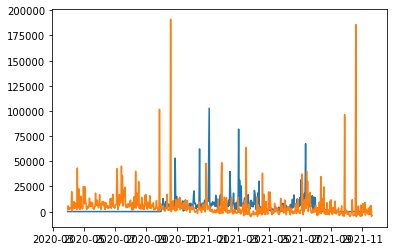

In [25]:
#plotting line garph actual vs predicted values
plt.plot(Data_Dine_Test)
plt.plot(ES_Pred)
